In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# International Tourist Destination Visit https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/pariwisata/iinternational_tourist_destination.csv?token=ASDCMJUEXJX4F7VJZTVNTQ3BMQSAY
itdv = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/pariwisata/iinternational_tourist_destination.csv?token=ASDCMJUEXJX4F7VJZTVNTQ3BMQSAY')
itdv['tanggal'] = itdv['tahun'].astype(str) + '-' + itdv['bulan'].astype(str)
itdv['tanggal'] = pd.to_datetime(itdv['tanggal'])
itdv.rename({'jumlah' : 'turis_mancanegara'}, axis = 1,inplace = True)
itdv = itdv.groupby(['tanggal'], as_index = False).agg({'turis_mancanegara' : 'sum'})
itdv = itdv[itdv['tanggal'] >= '2020-03-01'].reset_index(drop = True)

#National Tourist Destination visit https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/pariwisata/national_tourist_destination.csv?token=ASDCMJS6YWO45RSNITWJXTLBMQSWG
ntdv = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/pariwisata/national_tourist_destination.csv?token=ASDCMJS6YWO45RSNITWJXTLBMQSWG')
ntdv['tanggal'] = ntdv['tahun'].astype(str) + '-' + ntdv['bulan'].astype(str)
ntdv['tanggal'] = pd.to_datetime(ntdv['tanggal'])
ntdv.rename({'jumlah' : 'turis_domestik'}, axis = 1,inplace = True)
ntdv = ntdv.groupby(['tanggal'], as_index = False).agg({'turis_domestik' : 'sum'})
ntdv = ntdv[ntdv['tanggal'] >= '2020-03-01'].reset_index(drop = True)
ntdv

,tanggal,turis_domestik
0,2020-03-01,768061.0
1,2020-04-01,426.0
2,2020-05-01,0.0
3,2020-06-01,82507.0
4,2020-07-01,214264.0
5,2020-08-01,403467.0
6,2020-09-01,144847.0
7,2020-10-01,4095983.0
8,2020-11-01,316751.0
9,2020-12-01,649984.0


,turis_mancanegara,turis_domestik
0,5279,768061.0
1,0,426.0
2,0,0.0
3,163,82507.0
4,356,214264.0
5,378,403467.0
6,181,144847.0
7,321,4095983.0
8,342,316751.0
9,300,649984.0


In [45]:
#Covid Jakarta daily cases https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/covid/covid19Jakarta.csv?token=ASDCMJTISXCR6PTECNW6VALBMQTN4
covid_jakarta = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/covid/covid19Jakarta.csv?token=ASDCMJTISXCR6PTECNW6VALBMQTN4')
covid_jakarta['tanggal'] = pd.to_datetime(covid_jakarta['Tanggal'])
covid_jakarta = covid_jakarta[covid_jakarta['tanggal'] < '2021-01-01']
covid_jakarta = covid_jakarta.loc[:, ["Positif Harian", "tanggal"]]
covid_jakarta.rename({'Positif Harian': 'positif_harian_dki'}, axis =1, inplace = True)
covid_jakarta

,positif_harian_dki,tanggal
0,741,2020-03-01
1,3397,2020-04-01
2,3134,2020-05-01
3,4004,2020-06-01
4,9925,2020-07-01
5,19108,2020-08-01
6,34059,2020-09-01
7,31229,2020-10-01
8,31264,2020-11-01
9,46874,2020-12-01


In [36]:
turis_tojakarta = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/pariwisata/jumlah-wisatawan-mancanegara-ke-dkijakarta-2012-2020.csv?token=ASDCMJWTVK3T3DFYIEWEWW3BMQ2NK')
turis_tojakarta['tanggal'] = pd.to_datetime(turis_tojakarta['tanggal'])
turis_tojakarta = turis_tojakarta[(turis_tojakarta['tanggal'] >= '2020-03-01') & (turis_tojakarta['tanggal'] <= '2020-12-01')].reset_index(drop = True)
turis_tojakarta

,Bulan,jumlah_wisatawan,tahun,tanggal
0,3,52631,2020,2020-03-01
1,4,417,2020,2020-04-01
2,5,395,2020,2020-05-01
3,6,909,2020,2020-06-01
4,7,3119,2020,2020-07-01
5,8,4469,2020,2020-08-01
6,9,7468,2020,2020-09-01
7,10,10492,2020,2020-10-01
8,11,14309,2020,2020-11-01
9,12,21812,2020,2020-12-01


In [51]:
penerbangan_dki = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/pariwisata/jumlah_penerbangan.csv?token=ASDCMJV2CBLAQVYRBIVFJ5DBMQ724')
penerbangan_dki['Bulan'] = pd.to_datetime(penerbangan_dki['Bulan'])
penerbangan_dki = penerbangan_dki[(penerbangan_dki['Bulan'] >= '2020-03-01') & (penerbangan_dki['Bulan'] <= '2020-12-01')].reset_index(drop = True)
penerbangan_dki 

,Unnamed: 0,index,Domestik,Internasional,Total,Bulan
0,2,2,1211697,187899,1399596,2020-03-01
1,3,3,191002,17499,208501,2020-04-01
2,4,4,27500,9460,36960,2020-05-01
3,5,5,174352,14619,188971,2020-06-01
4,6,6,427731,22618,450349,2020-07-01
5,7,7,574597,28513,603110,2020-08-01
6,8,8,500591,32043,532634,2020-09-01
7,9,9,601391,36549,637940,2020-10-01
8,10,10,828893,42028,870921,2020-11-01
9,11,11,931481,56330,987811,2020-12-01


In [47]:
df = itdv['turis_mancanegara']
df = pd.DataFrame(df)
df['turis_domestik'] =ntdv['turis_domestik']
df['positif_harian_dki'] = covid_jakarta['positif_harian_dki']
df['jumlah_turis_asing_dki'] = turis_tojakarta['jumlah_wisatawan']
df['jumlah_penerbangan_']
df

,turis_mancanegara,turis_domestik,positif_harian_dki,jumlah_turisasing_dki
0,5279,768061.0,741,52631
1,0,426.0,3397,417
2,0,0.0,3134,395
3,163,82507.0,4004,909
4,356,214264.0,9925,3119
5,378,403467.0,19108,4469
6,181,144847.0,34059,7468
7,321,4095983.0,31229,10492
8,342,316751.0,31264,14309
9,300,649984.0,46874,21812


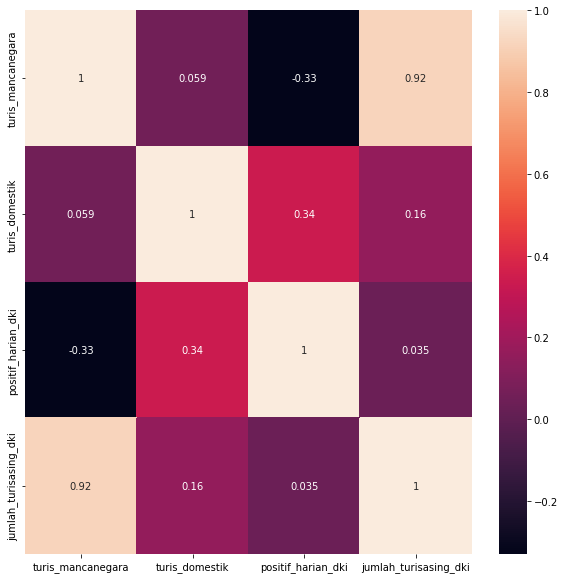

In [59]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(method='pearson'), annot = True)
plt.show()

In [60]:
df[['turis_domestik', 'positif_harian_dki']]

,turis_domestik,positif_harian_dki
0,768061.0,741
1,426.0,3397
2,0.0,3134
3,82507.0,4004
4,214264.0,9925
5,403467.0,19108
6,144847.0,34059
7,4095983.0,31229
8,316751.0,31264
9,649984.0,46874
